<a href="https://colab.research.google.com/github/Lenakirara/imersao-dados-alura/blob/main/Desafios_aula02_imersao_dados_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd

# fonte com amostra
fonte = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"

dados = pd.read_csv(fonte)
dados.head(1)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B


### Desafio Guilherme: Analisar amostra de alunos menores de idade e comparar a proporção por estado.

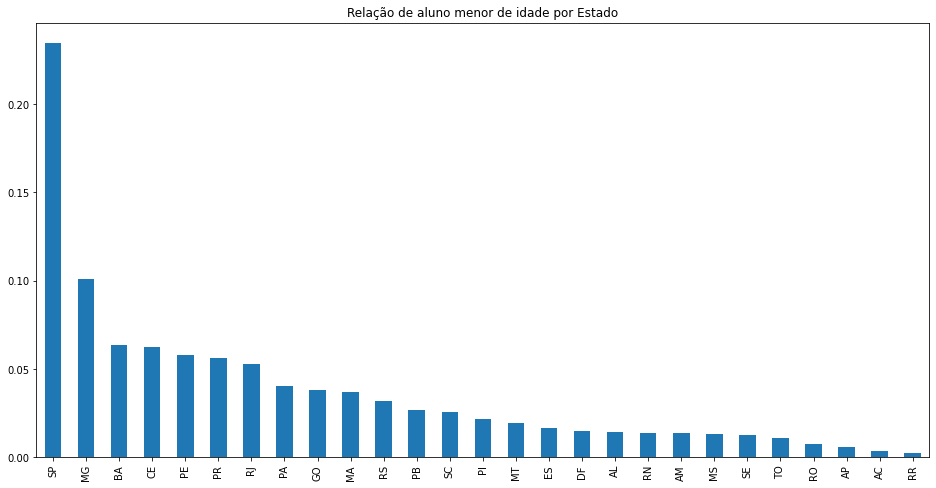

In [71]:
import matplotlib.pyplot as plt

aluno_menor_idade = dados.query('NU_IDADE < 18')[['NU_IDADE', 'SG_UF_RESIDENCIA']]
aluno_menor_idade["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(16,8))
plt.title("Relação de aluno menor de idade por Estado");

### Desafio 3: Criar uma função para plotar o boxplot do seaborn

In [72]:
import seaborn as sns

def plotar_boxplot(titulo, x, y, labelx, labely, dataset):
  ax, f = plt.subplots(figsize=(18, 6))
  sns.boxplot(x=x, 
              y=y, 
              data=dataset, 
              order=renda_ordenada)
  f.set_xlabel(labelx, fontsize=14)
  f.set_ylabel(labely, fontsize=14)
  f.set_title(titulo, fontsize=18)  
  ax=ax

In [73]:
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

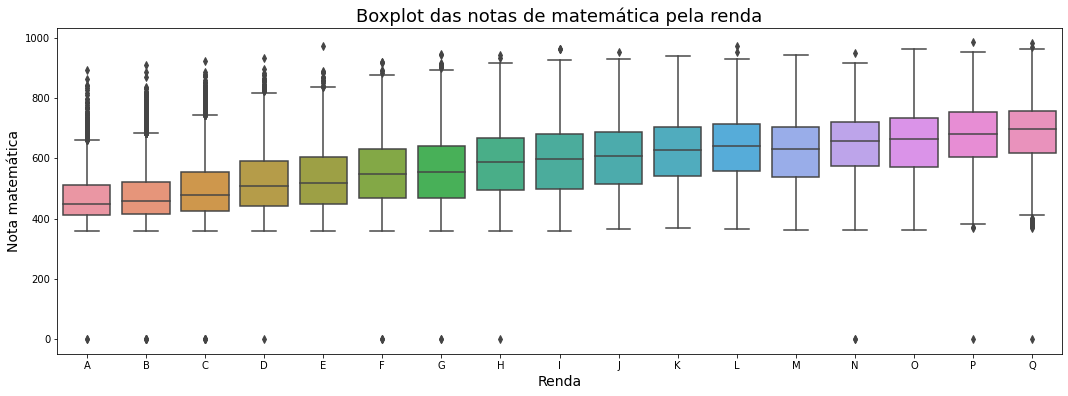

In [74]:
plotar_boxplot('Boxplot das notas de matemática pela renda', 'Q006', 'NU_NOTA_MT', 'Renda', 'Nota matemática', dados)

### Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

In [75]:
dados[['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
0,1,1,1,1
1,0,1,1,0
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
127375,1,1,1,1
127376,1,1,1,1
127377,0,1,1,0
127378,1,1,1,1


##### De acordo com dicionário:

- 0 - faltou à prova
- 1 - presente na prova
- 2 - eliminado na prova

In [76]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados[provas].sum()

NU_NOTA_CN         44334986.1
NU_NOTA_CH         49743676.1
NU_NOTA_LC         51027844.9
NU_NOTA_MT         48563933.8
NU_NOTA_REDACAO    56038440.0
dtype: float64

In [77]:
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head(1)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9


In [78]:
dados_presenca = dados.query("NU_NOTA_TOTAL == 0")
dados_presenca

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
10,190001005028,2019,1506807,Santarém,15,PA,28,F,2,3,1,1506807.0,Santarém,15.0,PA,1,9,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,B,A,B,2,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,0.0
11,190001005057,2019,1501709,Bragança,15,PA,36,F,1,3,1,1501709.0,Bragança,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,A,A,4,B,A,B,D,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B,0.0
26,190001005484,2019,1504208,Marabá,15,PA,26,M,2,3,1,1721208.0,Tocantinópolis,17.0,TO,1,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,B,C,C,2,C,A,B,B,A,A,B,A,A,A,B,A,A,B,A,A,C,A,B,B,0.0
38,190001006086,2019,1508126,Ulianópolis,15,PA,29,F,1,3,1,2108108.0,Paulo Ramos,21.0,MA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,A,5,C,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,C,A,A,B,0.0
40,190001006292,2019,1504422,Marituba,15,PA,24,M,1,1,1,1504422.0,Marituba,15.0,PA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,F,B,6,G,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,D,A,A,B,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127351,190006118552,2019,2604106,Caruaru,26,PE,20,F,1,1,1,2604106.0,Caruaru,26.0,PE,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,D,B,5,H,A,C,D,B,A,B,B,B,A,B,A,A,D,A,A,E,A,B,B,0.0
127365,190006119756,2019,2302503,Brejo Santo,23,CE,22,F,1,3,1,2308104.0,Mauriti,23.0,CE,2,0,2,1.0,0,23169249.0,2302503.0,Brejo Santo,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,5,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,0.0
127366,190006119783,2019,2304400,Fortaleza,23,CE,27,F,1,3,1,2304400.0,Fortaleza,23.0,CE,2,0,2,NaN,0,23071460.0,2304400.0,Fortaleza,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,4,B,A,B,B,A,B,B,A,A,A,B,A,A,A,A,A,A,B,B,A,0.0
127368,190006119802,2019,2507507,João Pessoa,25,PB,18,M,1,2,1,2507507.0,João Pessoa,25.0,PB,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,F,A,A,5,C,A,C,E,B,A,B,A,A,A,A,A,B,B,A,A,C,A,A,B,0.0


In [79]:
dados_presenca['TP_PRESENCA_CN'].value_counts(normalize=True)

0    0.999829
1    0.000171
Name: TP_PRESENCA_CN, dtype: float64

In [80]:
dados_presenca['TP_PRESENCA_CH'].value_counts(normalize=True)

0    0.994479
2    0.004115
1    0.001406
Name: TP_PRESENCA_CH, dtype: float64

In [81]:
dados_presenca['TP_PRESENCA_LC'].value_counts(normalize=True)

0    0.994479
2    0.004115
1    0.001406
Name: TP_PRESENCA_LC, dtype: float64

In [82]:
dados_presenca['TP_PRESENCA_MT'].value_counts(normalize=True)

0    0.999829
1    0.000171
Name: TP_PRESENCA_MT, dtype: float64

As provas de ciências natureza e matemática são realizadas no mesmo dia, bem como as de ciências humanas e linguagens e códigos também são realizadas no mesmo dia - por esse motivo os valores são iguais.

### Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)


In [83]:
dados.query('TP_PRESENCA_CN == 2 or TP_PRESENCA_LC == 2')[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
77,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN,NaN
446,NaN,NaN,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
125216,NaN,NaN,NaN,NaN,NaN
125503,NaN,472.4,476.8,NaN,520.0
125784,NaN,NaN,NaN,NaN,NaN
126769,NaN,NaN,NaN,NaN,NaN


In [84]:
dados.query('TP_PRESENCA_CN == 2')['NU_NOTA_CN'].unique()

array([nan])

In [85]:
dados.query('TP_PRESENCA_LC == 2')['NU_NOTA_LC'].unique()

array([nan])

In [86]:
dados.query('TP_PRESENCA_CH == 2 or TP_PRESENCA_MT == 2')[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
77,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN,NaN
446,NaN,NaN,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
125216,NaN,NaN,NaN,NaN,NaN
125503,NaN,472.4,476.8,NaN,520.0
125784,NaN,NaN,NaN,NaN,NaN
126769,NaN,NaN,NaN,NaN,NaN


In [87]:
dados.query('TP_PRESENCA_CH == 2')['NU_NOTA_CH'].unique()

array([nan])

In [88]:
dados.query('TP_PRESENCA_MT == 2')['NU_NOTA_MT'].unique()

array([nan])

Nota-se que quando o candidato é eliminado é colocado como NaN

### Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.


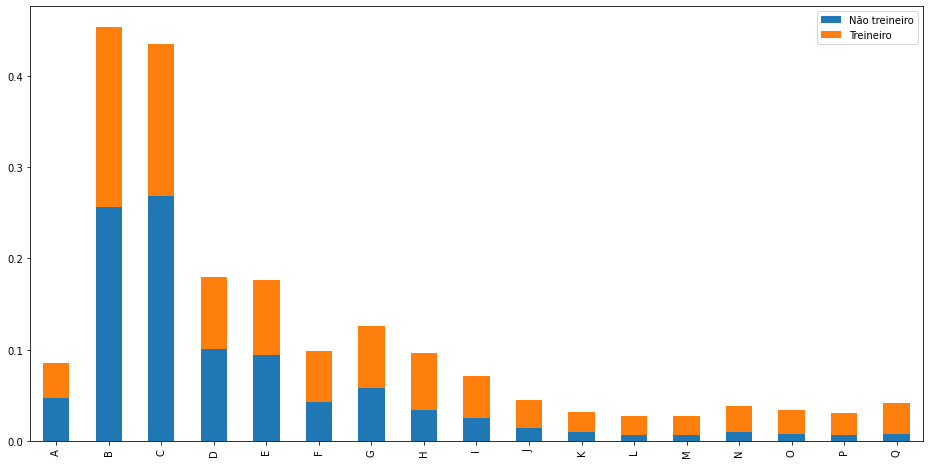

In [93]:
r_n_treineiro = dados.query("IN_TREINEIRO == 0")['Q006'].value_counts(normalize=True)
r_treineiro = dados.query("IN_TREINEIRO == 1")['Q006'].value_counts(normalize=True)

renda_treineiro = pd.DataFrame({'Não treineiro': r_n_treineiro,
                                'Treineiro': r_treineiro})
ax = renda_treineiro.plot.bar(stacked=True, figsize=(16,8))

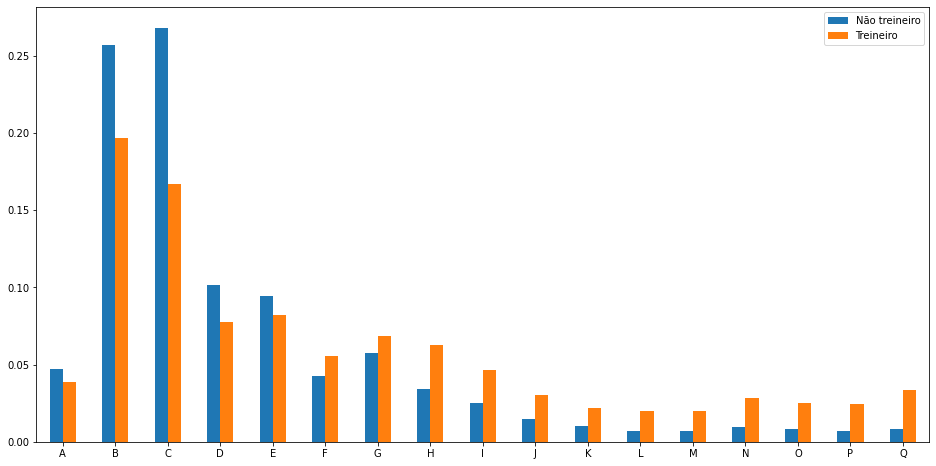

In [95]:
ax = renda_treineiro.plot.bar(rot=0, figsize=(16,8))

### Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

In [99]:
sem_nota_zero = dados.query("NU_NOTA_TOTAL != 0")
sem_nota_zero.head(1)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9


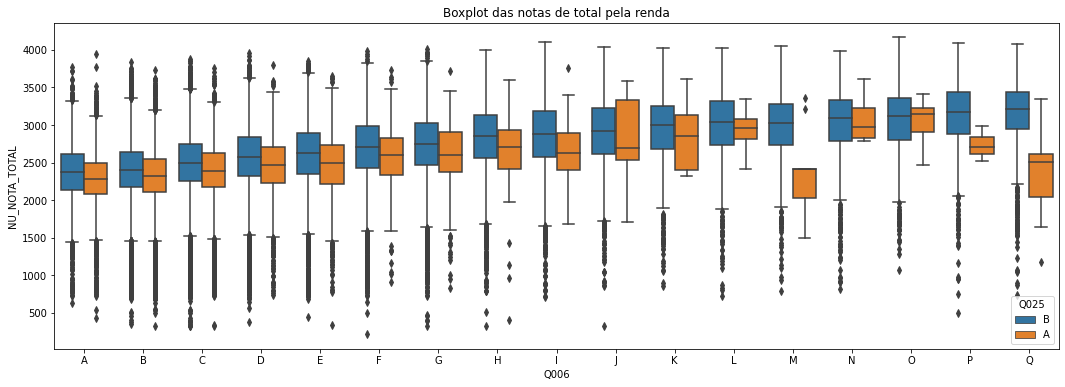

In [105]:
plt.figure(figsize=(18, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = sem_nota_zero, hue='Q025', order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda");

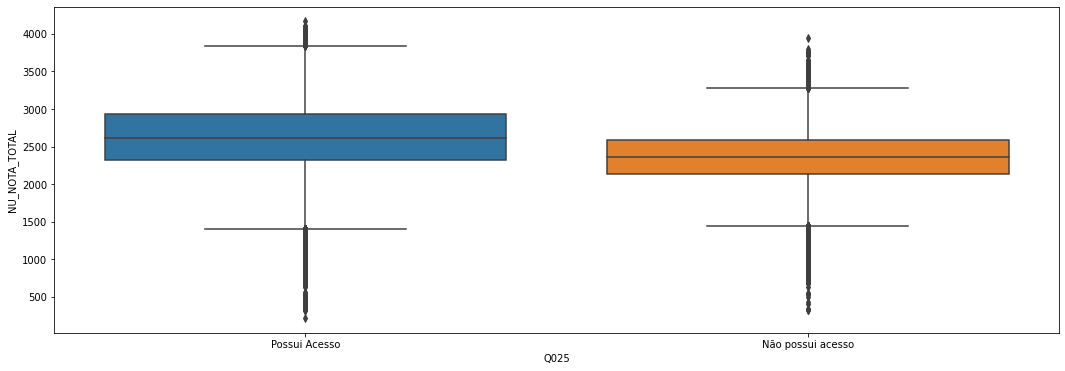

In [104]:
# analisar a relação de alunos que possuem ou não internet
plt.figure(figsize=(18, 6))
ax = sns.boxplot(x='Q025',
                 y='NU_NOTA_TOTAL',
                 data=sem_nota_zero)
ax.set_xticklabels(['Possui Acesso', 'Não possui acesso'])
ax.set_title('Relação da nota total com ');

### Desafio extra: Analisar quantas pessoas que residem em um estado fazem prova em outro estado.


In [3]:
dados.query('SG_UF_RESIDENCIA != SG_UF_PROVA')[['SG_UF_RESIDENCIA', 'SG_UF_PROVA']].value_counts()

SG_UF_RESIDENCIA  SG_UF_PROVA
MA                PI             59
MG                SP             58
BA                SE             55
PB                PE             54
GO                DF             44
                                 ..
PI                RS              1
                  RO              1
                  RJ              1
MG                MA              1
AC                AM              1
Length: 220, dtype: int64